# Analyzing Video with OpenCV and NumPy

## Task 1: Import libraries

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 

VFILE = "video/hot_rod.mp4"

## Task 1: Define generator for reading video

In [17]:
def get_frames(filename):
    video = cv2.VideoCapture(filename)
    while video.isOpened():
        ret, frame = video.read()
        if ret:
            yield frame
        else:
            break
    video.release()
    yield None
    


## Task 2: Retrieve and display video frames

In [19]:
def get_frame(filename, index):
    counter = 0
    video = cv2.VideoCapture(filename)
    while video.isOpened():
        ret, frame = video.read()
        if ret:
            if counter == index:
                return frame
            counter += 1       
        else:
            break
    video.release()
    return None
    


## Task 2: Define function to get a single video frame

shape  (480, 640, 3)
pixel at (0,0) [47 19  0]
pixel at (150, 75) [150 127  86]
pixel at (246, 234) [188 170 146]


## Task 2: Examining pixels

In [25]:
frame = get_frame(VFILE, 80)
print('shape ', frame.shape)
print('pixel at (0,0)', frame[0,0,:])
print('pixel at (150, 75)', frame[150,75,:])
print('pixel at (246, 234)', frame[246,234,:])

shape  (480, 640, 3)
pixel at (0,0) [47 19  0]
pixel at (150, 75) [150 127  86]
pixel at (246, 234) [188 170 146]


## Task 2: Displaying a video frame

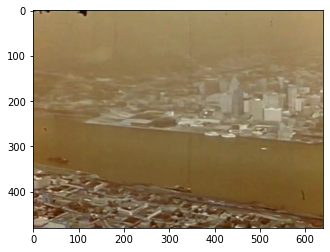

In [26]:
plt.imshow(frame)

## Task 3: Fixing color convention

pixel at (0,0)  [ 0 19 47]


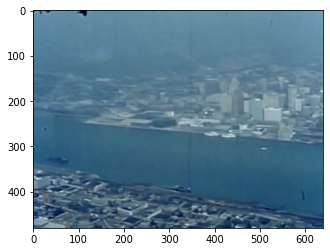

In [27]:
fix_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
print('pixel at (0,0) ', fix_frame[0,0,:])
plt.imshow(fix_frame)


## Task 3: Cropping a video frame

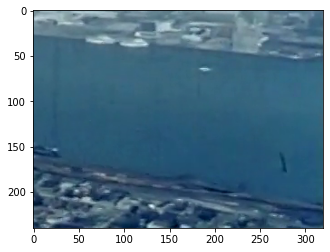

In [28]:
plt.imshow(fix_frame[240:480, 320:640])

## Task 3: Adjusting Brightness

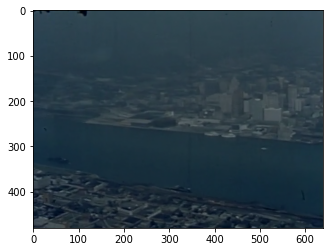

In [29]:
darker = 0.5 * fix_frame
darker = darker.astype(np.uint8)
plt.imshow(darker)

## Task 4: Drawing a circle

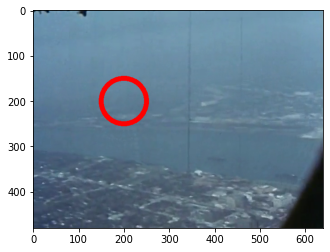

In [30]:
frame = get_frame(VFILE, 200)
cv2.circle(frame,
          center = (200,200),
          radius = 50,
          color = (0,0,255),
          thickness= 10)
fixed_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(fixed_frame)

## Task 4: Processing an entire video

In [33]:
counter = 0
for frame in get_frames(VFILE):
    if frame is None:
        break
    cv2.putText(frame, 
               text=str(counter),
               org=(100,100),
               fontFace=cv2.FONT_HERSHEY_SIMPLEX,
               fontScale=1,
               color=(0,255,0),
               thickness=3)
    cv2.imshow('frame', frame)    
    if cv2.waitKey(10) == 27:
        break
    counter += 1
    
cv2.destroyAllWindows()


## Task 5: Generating a new video file

In [34]:
fourcc = cv2.VideoWriter_fourcc('M', 'P', '4', 'V')
video_out = cv2.VideoWriter("new.mp4", fourcc, 20, (640,480))

counter = 0
for frame in get_frames(VFILE):
    if frame is None:
        break
    cv2.putText(frame, 
               text=str(counter),
               org=(100,100),
               fontFace=cv2.FONT_HERSHEY_SIMPLEX,
               fontScale=1,
               color=(0,255,0),
               thickness=3)
    video_out.write(frame)
    counter += 1
video_out.release()

## Task 5: Finding the total frame count

In [36]:
video = cv2.VideoCapture(VFILE)
count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
video_out.release()
print('frame count ', count)

frame count  3597


## Task 6: Creating a collage

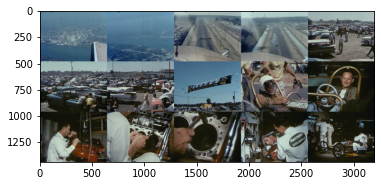

In [40]:
skip_frames = count // 15

frames = []
counter = 0
for f in get_frames(VFILE):
    if counter % skip_frames == 0:
        frames.append(f)
    counter += 1
    
row1 = np.concatenate(frames[0:5], axis = 1)
row2 = np.concatenate(frames[5:10], axis = 1)
row3 = np.concatenate(frames[10:15], axis =1)
collage = np.concatenate((row1, row2, row3), axis= 0)
collage = cv2.cvtColor(collage, cv2.COLOR_BGR2RGB)
plt.imshow(collage)

    